# Report 1 Content

## Data Pre-Processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
product_attribute = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Cleaned Data/Product Attributes.xlsx')
fz_meat = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Data/Data/Fz_Rfg Substitute Meat_POS_2020.xlsx')
fz_meat2 = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Data/Data/Fz_Rfg Substitute Meat_POS_2021.xlsx')
fz_meat3 = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Data/Data/Fz_Rfg Substitute Meat_POS_2022.xlsx')
fz_meat4 = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Data/Data/Fz_Rfg Substitute Meat_POS_2023.xlsx')
fz_meat5 = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Data/Data/Fz_Rfg Substitute Meat_POS_2024.xlsx')

In [3]:
product_attribute.head()

,Product,UPC 13 digit,Aisle Name,Category Name,Sub-Category Name,Manufacturer Name,Brand Franchise Name,Brand Name,Package,Total Count,Total Ounces,Form,Flavor / Scent,Meat Source,Product Type,Type Of Meat Substituted,Type Of Substitute,Cooked Info
0,AL SAFA HALAL FROZEN BEEF HOTDOG 12.6 OZ - 062...,624967436101,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,AL SAFA HALAL,AL SAFA HALAL,AL SAFA HALAL,VACUUM PACKED,8.0,12.6,NaN,REGULAR,BEEF,HOT DOG,NaN,NaN,NaN
1,AL SAFA HALAL FROZEN CHICKEN FRANKFURTER 12 OZ...,624967508101,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,AL SAFA HALAL,AL SAFA HALAL,AL SAFA HALAL,VACUUM PACKED,6.0,12.0,NaN,REGULAR,CHICKEN,FRANKFURTER,NaN,NaN,NaN
2,CLOVERDALE MEATS FROZEN BEEF AND PORK FRANKFUR...,76829017602,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,CLOVERDALE FOODS CO,CLOVERDALE,CLOVERDALE MEATS,BOX,40.0,160.0,NaN,REGULAR,BEEF AND PORK,FRANKFURTER,NaN,NaN,NaN
3,COUNTRY FRESH MEATS FROZEN PORK AND BEEF HOTDO...,829905000521,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,COUNTRY FRESH MEATS INC,COUNTRY FRESH MEATS,COUNTRY FRESH MEATS,VACUUM PACKED,8.0,16.0,NaN,COLBY CHEESE,PORK AND BEEF,HOT DOG,NaN,NaN,NaN
4,NOBRAND FROZEN BEEF HOTDOG 80 OZ - 0694022680771,694022680771,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,FAIR MARKET INC,NOBRAND,NOBRAND,BOX,20.0,80.0,NaN,CHEDDAR JALAPENO,BEEF,HOT DOG,NaN,NaN,NaN


In [4]:
fz_meat.count()

Geography                                          221397
Time                                               221397
Product                                            221397
UPC 13 digit                                       221397
Unit Sales                                         221397
Unit Sales No Merch                                217766
Unit Sales Any Merch                               143217
Unit Sales Price Reductions Only                   137308
Unit Sales Feature Only                             25455
Unit Sales Display Only                             38319
Unit Sales Special Pack Only                            0
Unit Sales Feature and Display                       4936
Volume Sales                                       221397
Volume Sales No Merch                              217766
Volume Sales Any Merch                             143217
Volume Sales Price Reductions Only                 137308
Volume Sales Feature Only                           25455
Volume Sales D

In [5]:
# Imputation
def imputation_process(row):
    row['Incremental Units'] = row['Unit Sales'] - row['Base Unit Sales']
    row['Incremental Volume'] = row['Volume Sales'] - row['Base Volume Sales']
    row['Incremental Dollars'] = row['Dollar Sales'] - row['Base Dollar Sales']
    return row

# Split Geography column and only save its location
def extract_location(col):
    return col.split(' - ')[0]

# convert time into year month and day
def parse_time(col):
    # Year, month, day
    sep_data = col.split('-')
    year = int('20' + sep_data[2])
    month = int(sep_data[0][-2:])
    day = int(sep_data[1])
    # Quarter of given date
    quarter = (month - 1) // 3 + 1
    return pd.Series([year, quarter, month], index = ['Year', 'Quarter', 'Month'])

# Split product column and only save company name and product name
def parse_product(col):  
    return col.split(' - ')[0]


# Based on length of company name, select product name
def extract_product_name(full_string, brand_name):
    brand_name_length = len(brand_name)
    words = full_string[brand_name_length:].strip()
    return words

# # Arrange columns order
def change_column_order(df):
    final_order = [
        'Geography', 'Year', 'Quarter', 'Month', 'Season', 'Form', 'Manufacturer Name',
        'Brand Name', 'Product Name', 'Flavor / Scent', 'Meat Source',
        'Unit Sales', 'Volume Sales', 'Dollar Sales', 'Price per Unit', 
        'Price per Volume', 'Base Unit Sales', 'Base Volume Sales', 'Base Dollar Sales',
        'Incremental Units', 'Incremental Volume', 'Incremental Dollars', 
        'ACV Weighted Distribution'
    ]
    return df[final_order]

def merge_content(df1, df2):
    combined = df1.merge(df2, how = 'left', on = 'Product')
    return combined

def map_season(month):
    # Northern Hemisphere standard mapping
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'


# Full tranform process
def transform_data(df, df2):
    table1 = merge_content(df, df2)
    # Used customized function
    table1['Geography'] = table1['Geography'].map(extract_location)
    table1[['Year', 'Quarter', 'Month']] = table1['Time'].apply(parse_time)
    table1['Product'] = table1['Product'].map(parse_product)
    table1['Product Name'] = table1.apply(lambda row: extract_product_name(row['Product'], row['Brand Name']), axis=1)
    #df['Product Name'] = df.apply(extract_product_name(df['Product'], df['Brand']), axis = 1)
    
    # Mapping quarter to seasonality
    table1['Season'] = table1['Month'].apply(map_season)
    # Change column order
    transformed = change_column_order(table1).apply(imputation_process, axis = 1)
    return transformed

In [6]:
combined = transform_data(fz_meat, product_attribute)
combined2 = transform_data(fz_meat2, product_attribute)
combined3 = transform_data(fz_meat3, product_attribute)
combined4 = transform_data(fz_meat4, product_attribute)
combined5 = transform_data(fz_meat5, product_attribute)

In [7]:
full_fz_rfg_sub = pd.concat([combined, combined2, combined3, combined4, combined5])

In [8]:
# output_file = '/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/full_fz_rfg_sub.csv'
# full_fz_rfg_sub.to_csv(output_file, index=False)

In [9]:
#test = fz_meat.merge(product_attribute, how = 'left', on = 'Product')
full_fz_rfg_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991780 entries, 0 to 12727
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Geography                  991780 non-null  object 
 1   Year                       991780 non-null  int64  
 2   Quarter                    991780 non-null  int64  
 3   Month                      991780 non-null  int64  
 4   Season                     991780 non-null  object 
 5   Form                       991780 non-null  object 
 6   Manufacturer Name          991780 non-null  object 
 7   Brand Name                 991780 non-null  object 
 8   Product Name               991780 non-null  object 
 9   Flavor / Scent             991780 non-null  object 
 10  Meat Source                0 non-null       float64
 11  Unit Sales                 991780 non-null  float64
 12  Volume Sales               991780 non-null  float64
 13  Dollar Sales               991780 n

In [10]:
full_fz_rfg_sub['Form'].unique()

array(['GROUND', 'BALL', 'BURGER PATTY', 'CRUMBLE', 'PATTY', 'BURGER',
       'LINK', 'MEATBALL', 'PIECE', 'SLICED', 'STEAK', 'SPARE RIBS',
       'CHUNK', 'TIP', 'SLICE', 'BREAKFAST PATTY', 'FILET', 'SLIDER',
       'CAKE', 'STRIP', 'BITE', 'POPPER', 'BREAKFAST SAUSAGE PATTY',
       'HOT DOG', 'PULLED', 'BREAKFAST LINK', 'FRANK', 'ROAST', 'WHOLE',
       'STICK', 'NOT STATED ON PACKAGE', 'BLOCK', 'ROLL', 'NUGGET',
       'BREAST', 'FINGER', 'TENDER', 'WING', 'CUTLET', 'DICED', 'POPCORN',
       'DIPPER', 'BREAKFAST BITES', 'CHUB', 'DINNER SAUSAGE LINK', 'CUBE',
       'BAR', 'LOAF', 'MEAT LOAF', 'BRATWURST', 'BREAKFAST SAUSAGE ROLL',
       'SPLIT ROPE', 'ROPE', 'ULTRA THIN SLICE', 'DELI SLICED', 'CUT',
       'BREAKFAST SAUSAGE LINK', 'GIZZARD', 'RIBLET', 'SAUSAGE',
       'DINNER LINK', 'DRUMSTICK', 'FUN NUGGETS', 'SHREDS', 'SHREDDED',
       'FRIES', 'TENDERS', 'BINGS', 'SAUSAGE PATTY', 'BAO BUN'],
      dtype=object)

In [11]:
# Morningstars marketshare
# Impossible marketsharex
# Combine Gardein & Gardein ultimate plant-based dollar sales
# Percentage Sales in Tender & Nug from MORNINGSTAR FARMS INCOGMEATO & GARDEIN ULTIMATE PLANT BASED & IMPOSSIBLE (or maybe top 3 sales company)

In [12]:
# NUMERIC CORRELATION IS USELESS
# corrmat = combined[numeric_col].corr().round(2)
# top_corr_features = corrmat.index
# plt.figure(figsize=(7, 7))
# sns.heatmap(combined[top_corr_features].corr(),annot=True, square=True, fmt='.2f',
#             cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

In [13]:
# output_file = '/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/test_merge.csv'
# combined.to_csv(output_file, index=False)

## Data Loading

In [2]:
full_fz_rfg_sub = pd.read_csv('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/full_fz_rfg_sub.csv')

## Analysis on TOP 10 Manufacture & Sales

<Figure size 1000x800 with 0 Axes>

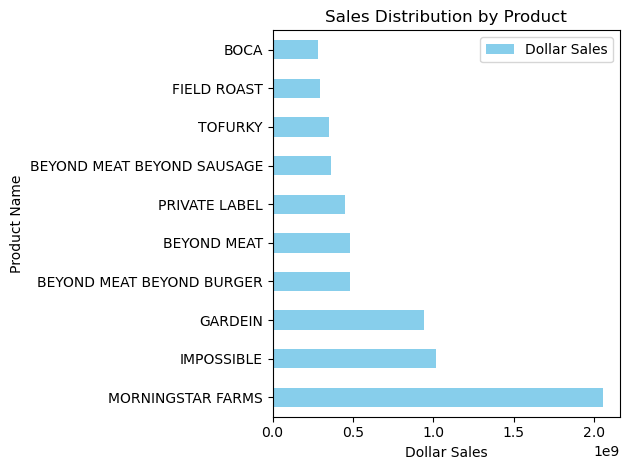

In [3]:
# Sales Distribution: Analyze the distribution of dollar sales across different manufacturers and brands to see which are the most popular or profitable.
brand_sales = full_fz_rfg_sub.groupby('Brand Name').agg({'Dollar Sales':'sum'}).sort_values('Dollar Sales', ascending = False).head(10)
brand_sales.reset_index()
#sns.barplot(data = brand_sales, x = 'Brand Name', y = 'Dollar Sales')
plt.figure(figsize=(10, 8))
brand_sales.plot(kind='barh', color='skyblue')
plt.title('Sales Distribution by Product')
plt.xlabel('Dollar Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [4]:
brand_sales = combined.groupby('Brand Name')['Dollar Sales'].sum().reset_index()

total_market_sales = brand_sales['Dollar Sales'].sum()


brand_sales['Market Share (%)'] = (brand_sales['Dollar Sales'] / total_market_sales) * 100
new_brand_sales = brand_sales.sort_values('Market Share (%)', ascending = False).head(10)
brand_sales, total_market_sales
# #Pie Chart for Market Share
# plt.figure(figsize=(10, 8))
# plt.pie(new_brand_sales['Market Share (%)'], labels=new_brand_sales['Brand Name'], autopct='%1.1f%%', startangle=140)
# plt.title('Market Share by Brand (Dollar Sales)')
# #plt.show()

# #Bar Chart for Market Share
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Market Share (%)', y='Brand Name', data=new_brand_sales, palette='viridis')
# plt.title('Market Share by Brand (Dollar Sales)')
# plt.xlabel('Market Share (%)')
# plt.ylabel('Brand Name')
# #plt.show()

NameError: name 'combined' is not defined

The first three manufacture that make most sales for meat alternative is "Morningstar Farms", "Gardein", "Beyong Meat Beyond Burger"

## Analysis on Sales Distribution, Focusing on Sales Per Unit

In [12]:
no_outliers_price_descriptive_stats = full_fz_rfg_sub[full_fz_rfg_sub['Price per Unit'] < 10]

count    947324.000000
mean          5.159229
std           1.571876
min           0.010000
25%           4.014746
50%           4.938277
75%           5.990000
max           9.999656
Name: Price per Unit, dtype: float64


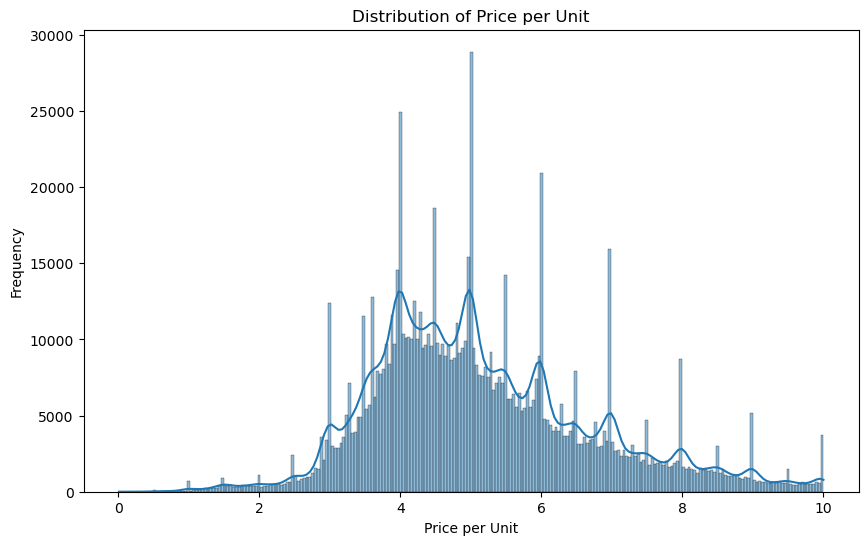

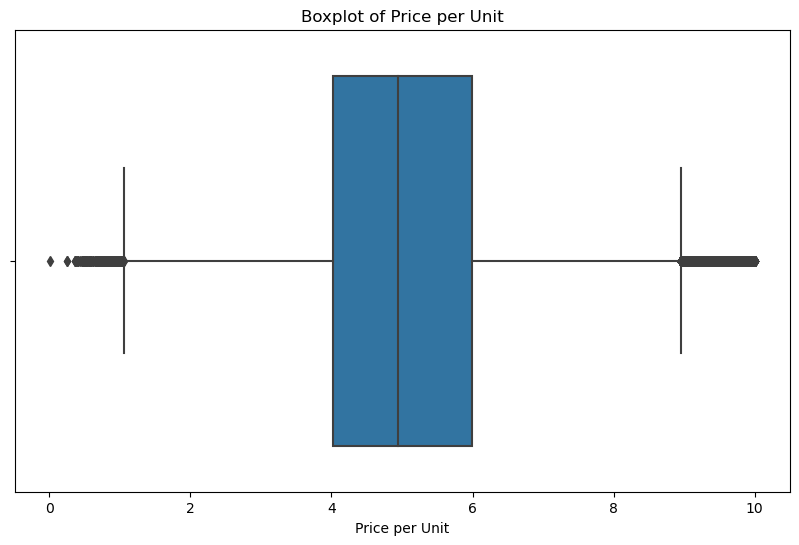

                Price per Unit  Dollar Sales
Price per Unit        1.000000      0.036067
Dollar Sales          0.036067      1.000000


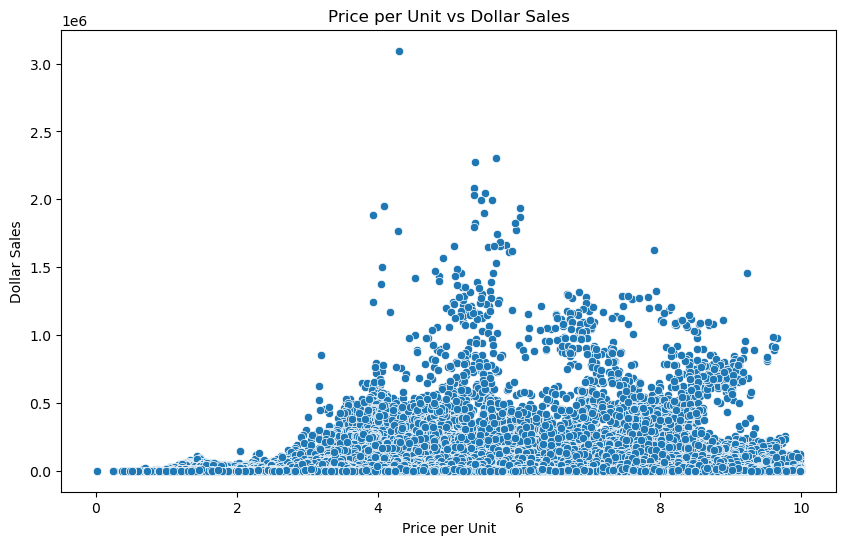

In [13]:
# Price Analysis: Study the price per unit to understand pricing strategies or to identify if there's a correlation between price and sales volume.
#price_descriptive_stats = full_fz_rfg_sub['Price per Unit'].describe()
price_descriptive_stats = no_outliers_price_descriptive_stats['Price per Unit'].describe()
print(price_descriptive_stats)

# Distribution of 'Price per Unit'
plt.figure(figsize=(10, 6))
sns.histplot(no_outliers_price_descriptive_stats['Price per Unit'], kde=True)
plt.title('Distribution of Price per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'Price per Unit'
plt.figure(figsize=(10, 6))
sns.boxplot(x=no_outliers_price_descriptive_stats['Price per Unit'])
plt.title('Boxplot of Price per Unit')
plt.xlabel('Price per Unit')
plt.show()

# Correlation analysis
correlation_matrix = no_outliers_price_descriptive_stats[['Price per Unit', 'Dollar Sales']].corr()
print(correlation_matrix)

# Scatter plot of 'Price per Unit' vs 'Dollar Sales'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=no_outliers_price_descriptive_stats, x='Price per Unit', y='Dollar Sales')
plt.title('Price per Unit vs Dollar Sales')
plt.xlabel('Price per Unit')
plt.ylabel('Dollar Sales')
plt.show()

It's clearly that when price of a product is between (0, 10), the sales reach high point. However, there are several product that has sales above 20, but none of their sales reach to even 1.0*1e6 unit of sales, and there are considered as outliers.
<strong>We can remove them since the amount of outliers, compared to majority of data, is less.<Strong>

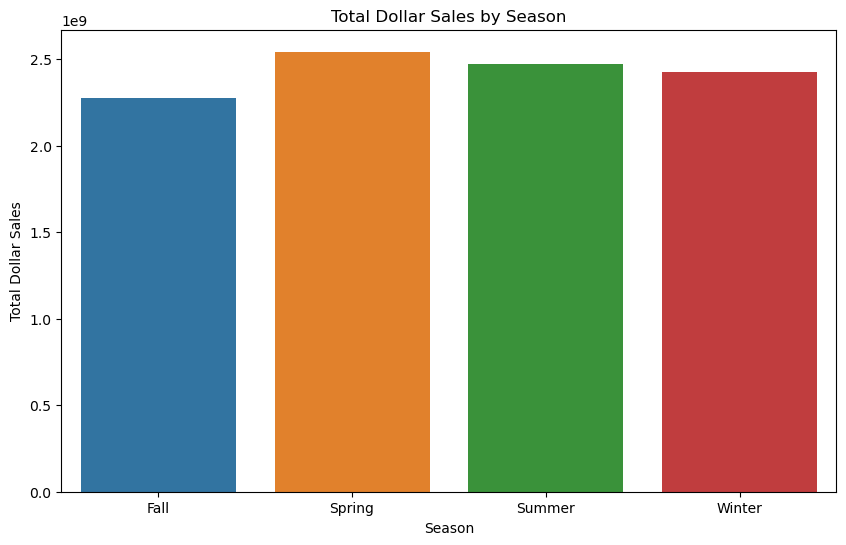

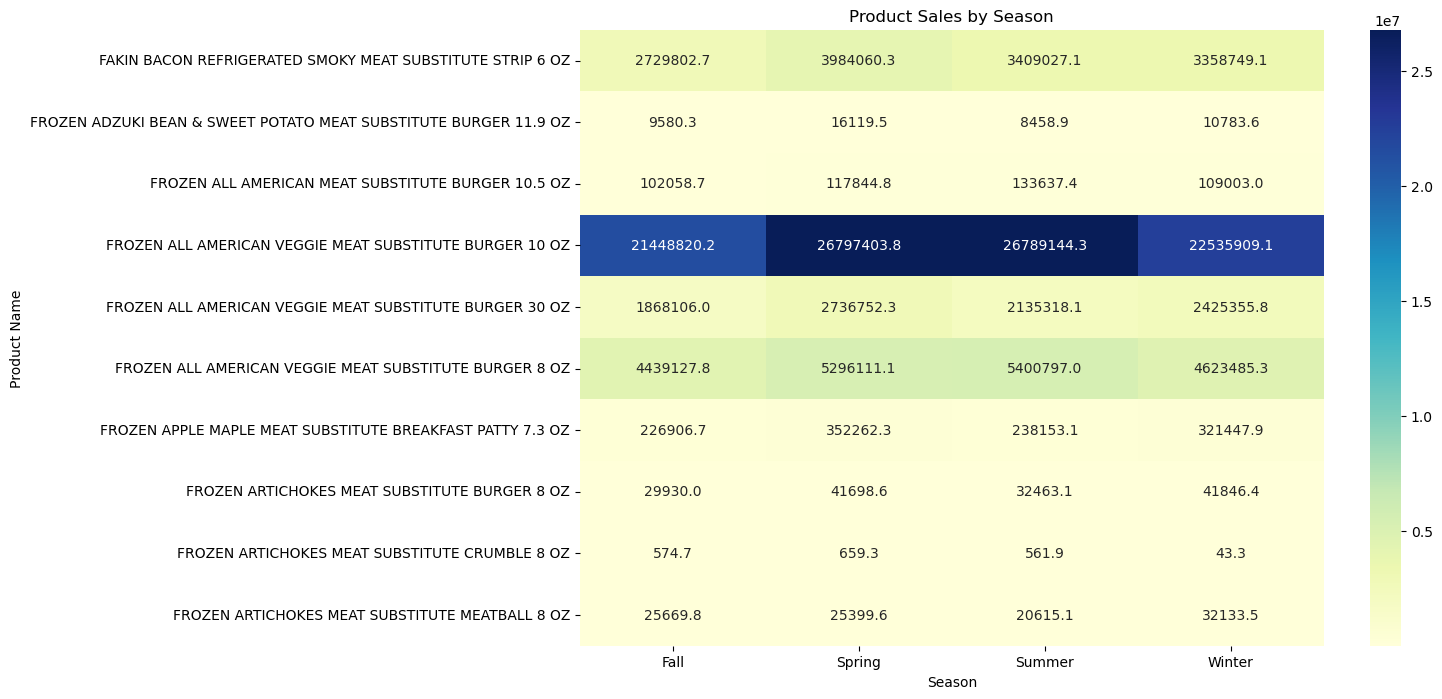

In [14]:
# Seasonality: Since the data includes a 'Season' column, you can examine seasonal trends in sales to determine if certain products sell better in certain seasons.
# Step 1: Aggregate Sales by Season
seasonal_sales = full_fz_rfg_sub.groupby('Season')['Dollar Sales'].sum().reset_index()

# Step 2: Visualize Sales Trends by Season
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_sales, x='Season', y='Dollar Sales')
plt.title('Total Dollar Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Dollar Sales')
plt.show()

# Step 3: Compare Product Performance by Season
product_seasonal_sales = full_fz_rfg_sub.groupby(['Season', 'Product Name'])['Dollar Sales'].sum().reset_index()

# Creating a pivot table for better visualization
pivot_table = product_seasonal_sales.pivot(index='Product Name', columns='Season', values='Dollar Sales').head(10)

# Visualizing with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Product Sales by Season')
plt.xlabel('Season')
plt.ylabel('Product Name')
plt.show()

For all meat alternative products, sales difference in seasonality is not big, however, sales in Spring still higher than the rest season

## Analysis: Sales by Location

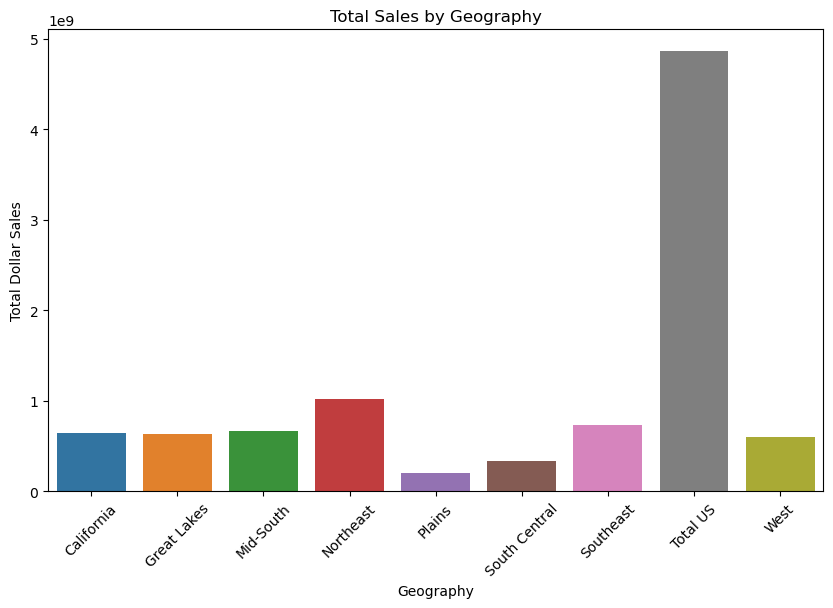

In [15]:
# Geographical Analysis: The 'Geography' column can be used to determine regional preferences or sales performance.
geo_sales_summary = full_fz_rfg_sub.groupby('Geography')['Dollar Sales'].agg(['sum', 'mean', 'count'])

# Step 2: Visualize Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(x=geo_sales_summary.index, y=geo_sales_summary['sum'])
plt.title('Total Sales by Geography')
plt.xlabel('Geography')
plt.ylabel('Total Dollar Sales')
plt.xticks(rotation=45)
plt.show()

Pattern:
1. Except mid region of U.S. such as Plains and South Central, all other regions have higher sales of meat alternative, especially in Northeast and Southeast.
2. This Probably because in mid region, people prefer to eat meat
3. It might be associated with slaughter industry

## Analysis: Seasonality

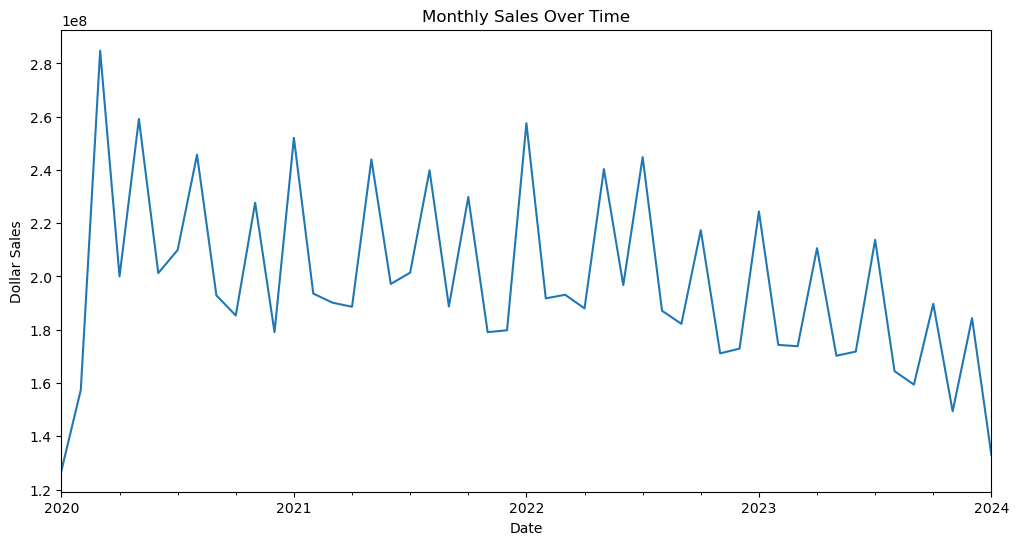

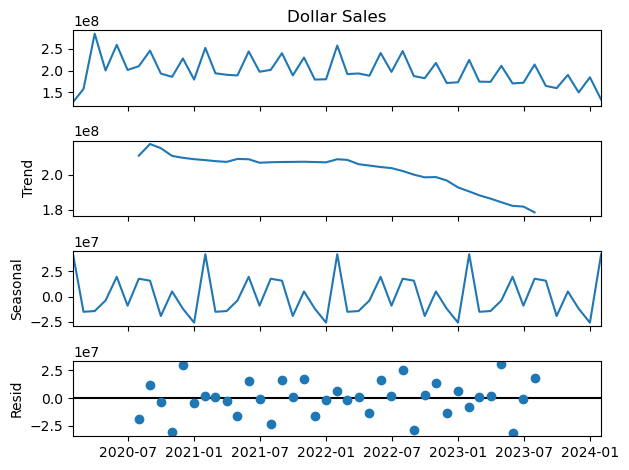

In [16]:
# Time Series Analysis: Use the 'Year', 'Quarter', and 'Month' columns to perform a time series analysis to see sales trends over time.

from statsmodels.tsa.seasonal import seasonal_decompose

# Time Series Analysis: Use the 'Year', 'Quarter', and 'Month' columns to perform a time series analysis to see sales trends over time.
full_fz_rfg_sub['Date'] = pd.to_datetime(full_fz_rfg_sub['Year'].astype(str) + '-' + (full_fz_rfg_sub['Month']).astype(str))

# Step 2: Aggregate Sales Over Time
# Set the date as the index and sort it
full_fz_rfg_sub.set_index('Date', inplace=True)
full_fz_rfg_sub.sort_index(inplace=True)

# Resample the data monthly and sum up the sales
monthly_sales = full_fz_rfg_sub['Dollar Sales'].resample('M').sum()

# Step 3: Visualize Sales Trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Dollar Sales')
plt.show()

# Step 4: Decompose the Time Series
result = seasonal_decompose(monthly_sales, model='additive')
result.plot()
plt.show()

Pattern
1. Data in 2024 is not sufficient
2. In each year, sales reach to high point and gradually decrease by the time until the end of the year
3. It might because 
    1. Spring produce more vegetables
    2. Hot weather in Summer make people have less appetize
    3. People tend to eat foods with high-energy, high-calories
4. The overall trend of meat alternative sales is in decrease

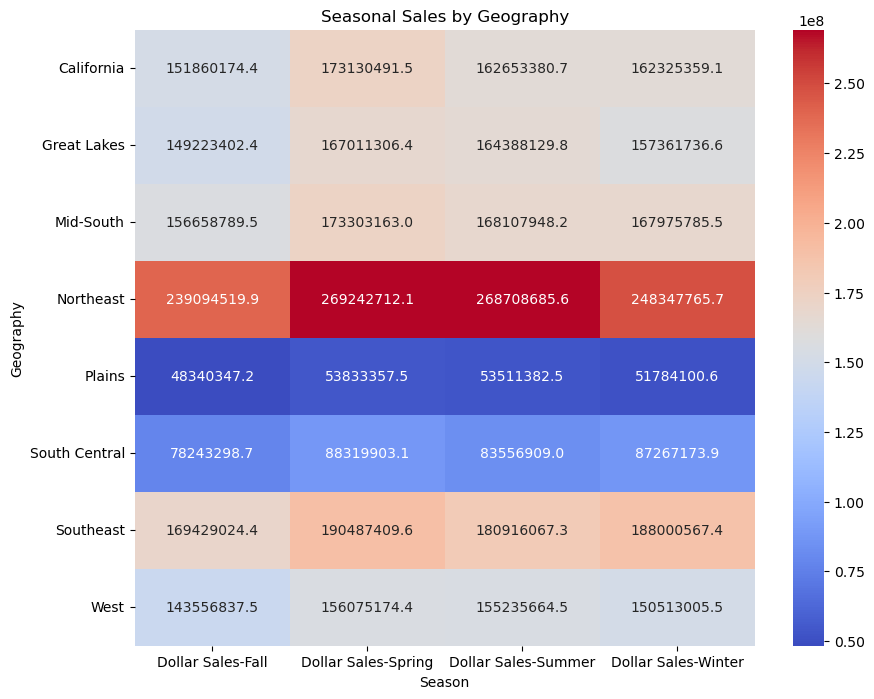

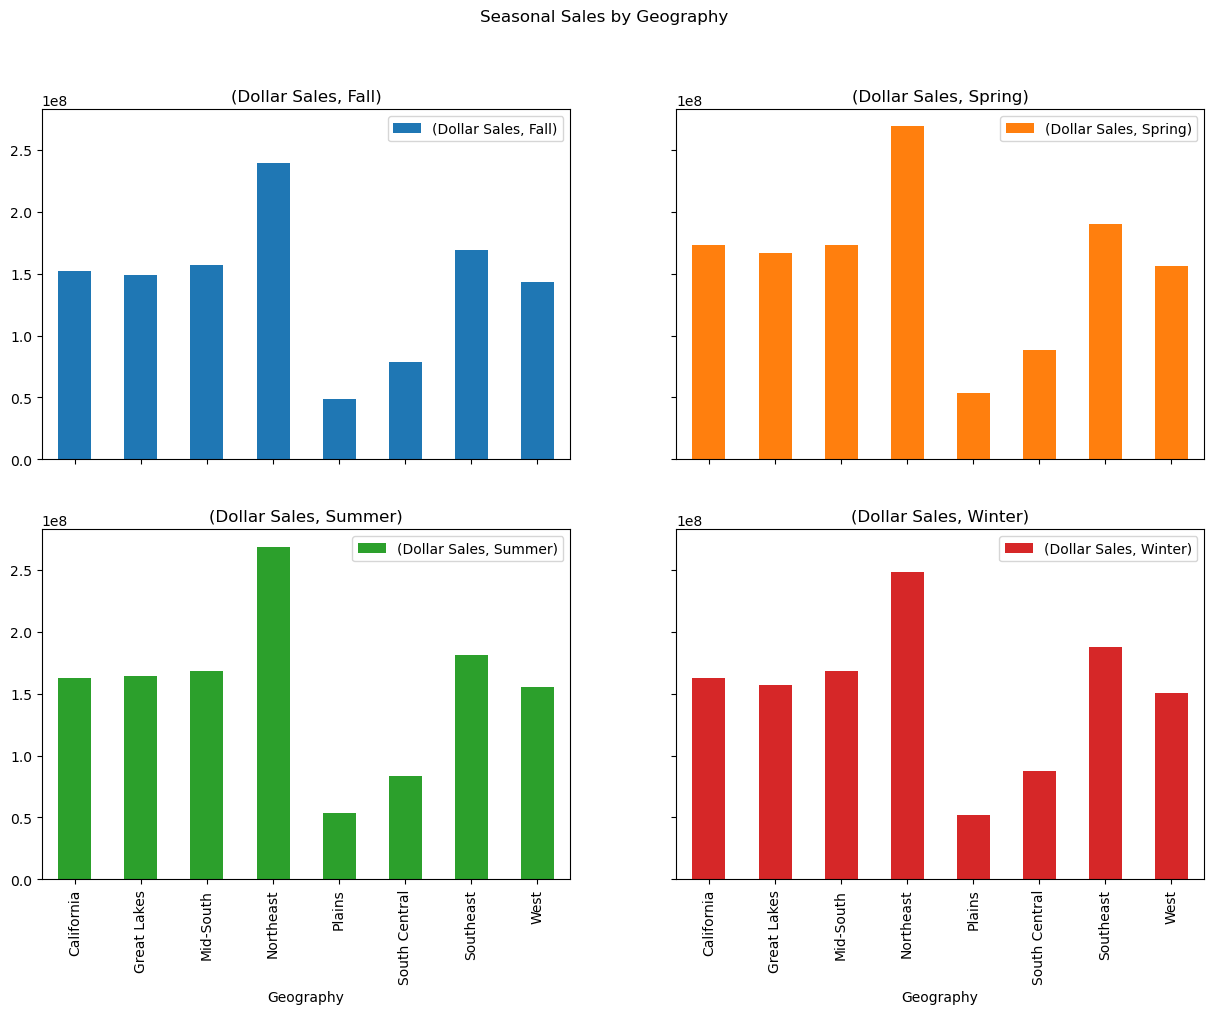

In [18]:
# Filter data
filtered_df = full_fz_rfg_sub[full_fz_rfg_sub['Geography'] != 'Total US']
# Step 1: Create a Pivot Table
pivot_table = filtered_df.pivot_table(
    values='Dollar Sales', 
    index=['Geography', 'Season'], 
    aggfunc='sum'
).sort_index()

# Step 2: Visualize Data
# For a simple heatmap:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table.unstack(level='Season'), cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Seasonal Sales by Geography')
plt.xlabel('Season')
plt.ylabel('Geography')
plt.show()

# For bar charts, if you want to compare seasons across geographies:
pivot_table.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize=(15, 10), sharey=True)
plt.suptitle('Seasonal Sales by Geography')
plt.show()

# Step 3: Statistical Analysis
# Depending on your requirements, you might perform an ANOVA test, time series decomposition, etc.



## Product & Flavor & Value | Unit Analysis

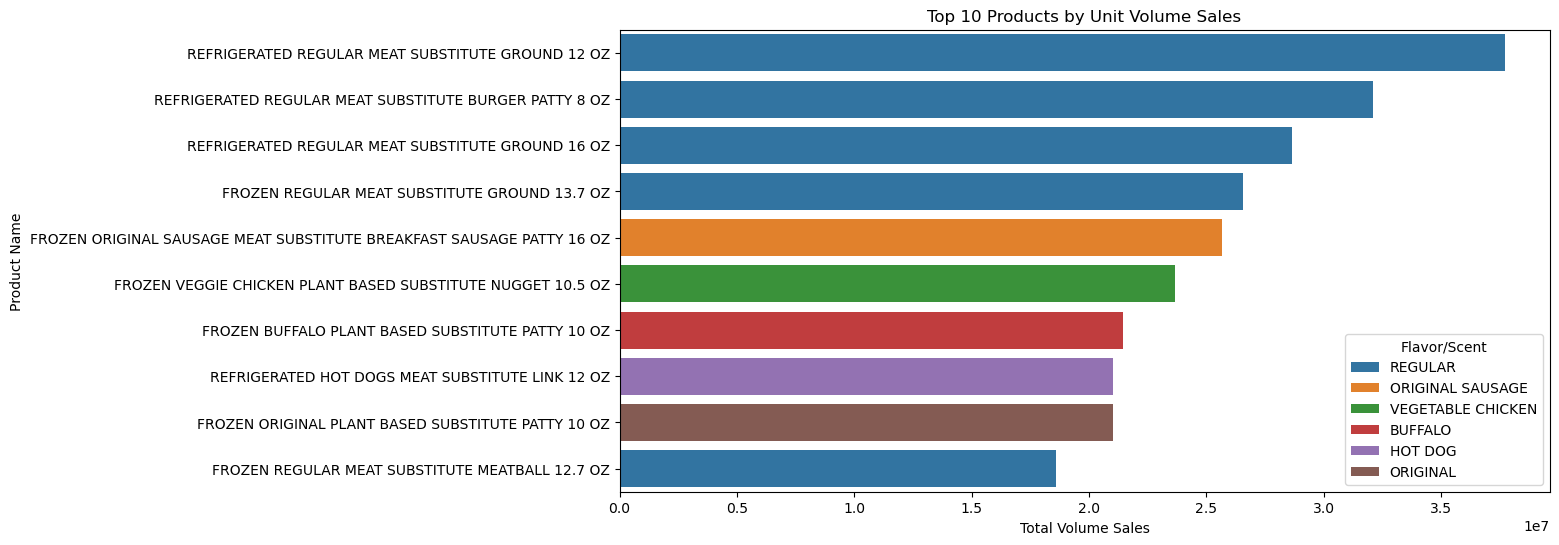

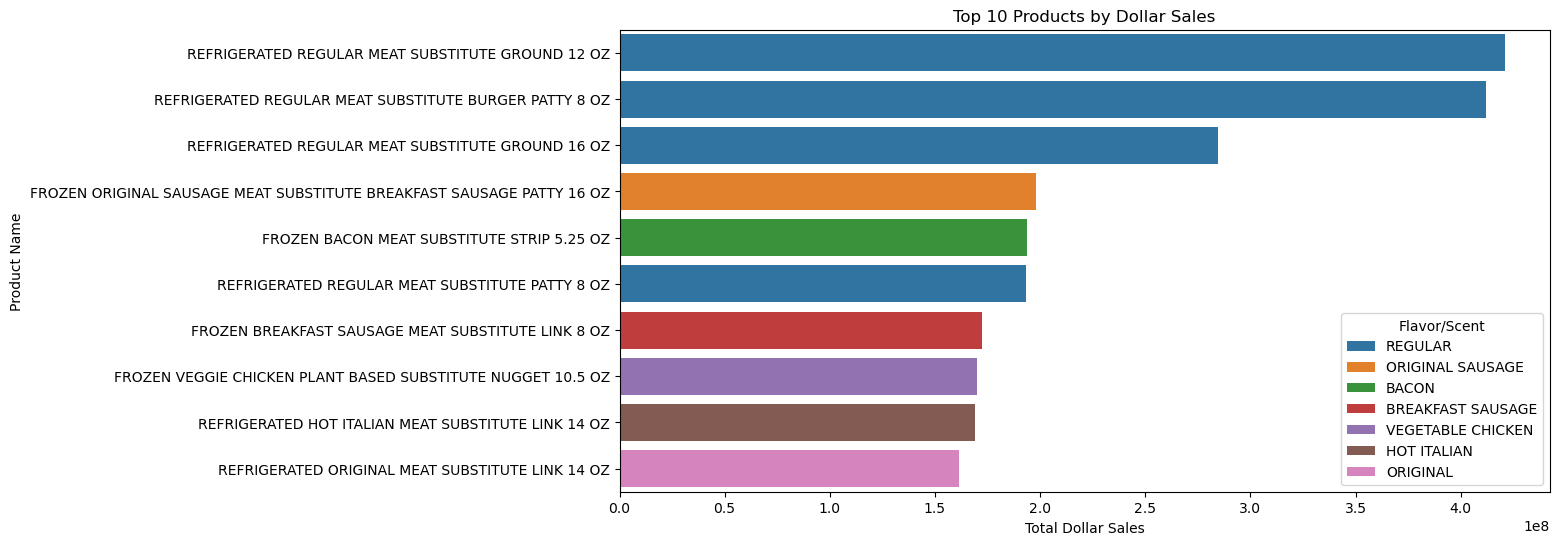

In [19]:
# Product Mix Analysis: Evaluate which products (Product Name, Flavor/Scent) are the strongest performers in terms of unit volume and dollar sales.
# Step 1: Aggregate Data by Product and Flavor
product_performance = full_fz_rfg_sub.groupby(['Product Name', 'Flavor / Scent']).agg({
    'Base Volume Sales': 'sum',
    'Dollar Sales': 'sum'
}).reset_index()

# Step 2: Rank Products by Sales Volume and Revenue
product_performance.sort_values(by='Base Volume Sales', ascending=False, inplace=True)

# Step 3: Visualize Product Performance
# Visualize the top 10 products by unit volume
plt.figure(figsize=(12, 6))
top_volume_products = product_performance.nlargest(10, 'Base Volume Sales')
sns.barplot(data=top_volume_products, x='Base Volume Sales', y='Product Name', hue='Flavor / Scent', dodge = False)
plt.title('Top 10 Products by Unit Volume Sales')
plt.xlabel('Total Volume Sales')
plt.ylabel('Product Name')
plt.legend(title='Flavor/Scent')
plt.show()

# Visualize the top 10 products by dollar sales
plt.figure(figsize=(12, 6))
top_sales_products = product_performance.nlargest(10, 'Dollar Sales')
sns.barplot(data=top_sales_products, x='Dollar Sales', y='Product Name', hue='Flavor / Scent', dodge=False)
plt.title('Top 10 Products by Dollar Sales')
plt.xlabel('Total Dollar Sales')
plt.ylabel('Product Name')
plt.legend(title='Flavor/Scent')
plt.show()

Similar, especially for the top 3 product. Dollar Sales & Volume Sales share the same ranking. 

# Report 2 Content

## Analysis: Product attributes between Morningstar & Gardein & Impossible

In [3]:
full_fz_rfg_sub.columns

Index(['Geography', 'Year', 'Quarter', 'Month', 'Season', 'Form',
       'Manufacturer Name', 'Brand Name', 'Product Name', 'Flavor / Scent',
       'Meat Source', 'Unit Sales', 'Volume Sales', 'Dollar Sales',
       'Price per Unit', 'Price per Volume', 'Base Unit Sales',
       'Base Volume Sales', 'Base Dollar Sales', 'Incremental Units',
       'Incremental Volume', 'Incremental Dollars',
       'ACV Weighted Distribution'],
      dtype='object')

In [48]:
# This will only increase top 3 companies that make plant-based meals, and focus on chicken products
filtered_df = full_fz_rfg_sub[(full_fz_rfg_sub['Brand Name'].str.contains('GARDEIN')) 
                              | (full_fz_rfg_sub['Brand Name'].str.contains('MORNINGSTAR'))
                             | (full_fz_rfg_sub['Brand Name'].str.contains('IMPOSSIBLE'))]

In [49]:
temp = filtered_df[(filtered_df['Manufacturer Name'] == 'CONAGRA BRANDS') & (filtered_df['Flavor / Scent'] == 'CHICKEN')]
temp['Product Name'].drop_duplicates()

361           FROZEN CHICKEN POULTRY SUBSTITUTE STRIP 10 OZ
230022       FROZEN CHICKEN POULTRY SUBSTITUTE TENDER 15 OZ
231529    FROZEN CHICKEN PLANT BASED SUBSTITUTE NUGGET 1...
471396    FROZEN CHICKEN PLANT BASED CHICKEN SUBSTITUTE ...
477715           FROZEN CHICKEN MEAT SUBSTITUTE FILET 15 OZ
484092    FROZEN CHICKEN PLANT BASED SUBSTITUTE WING 14....
Name: Product Name, dtype: object

In [50]:
filtered_df.head(5)

,Geography,Year,Quarter,Month,Season,Form,Manufacturer Name,Brand Name,Product Name,Flavor / Scent,...,Dollar Sales,Price per Unit,Price per Volume,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars,ACV Weighted Distribution
32,Total US,2020,1,1,Winter,TIP,CONAGRA BRANDS,GARDEIN,FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ,BEEF,...,104457.642635,3.500672,6.223417,19728.198361,11097.111579,83502.999603,10111.113376,5687.501274,20954.643032,32.604784
33,Total US,2020,1,1,Winter,BURGER,CONAGRA BRANDS,GARDEIN,FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTITUTE BUR...,CHIPOTLE BLACK BEAN,...,97010.214893,3.684628,4.912838,16897.612160,12673.209112,72219.977427,9430.745251,7073.058946,24790.237466,28.095010
34,Total US,2020,1,1,Winter,BURGER,CONAGRA BRANDS,GARDEIN,FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTITUTE BUR...,CHIPOTLE BLACK BEAN,...,435.620000,11.773514,3.924505,37.000000,111.000000,435.620000,0.000000,0.000000,0.000000,0.009000
35,Total US,2020,1,1,Winter,BURGER,CONAGRA BRANDS,GARDEIN,FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTITUTE BUR...,CHIPOTLE BLACK BEAN,...,63462.960000,14.489260,4.563547,3464.639994,11000.231997,51556.784374,915.360006,2906.268003,11906.175626,3.709527
36,Total US,2020,1,1,Winter,MEATBALL,CONAGRA BRANDS,GARDEIN,FROZEN CLASSIC MEAT SUBSTITUTE MEATBALL 12.7 OZ,CLASSIC,...,6.480000,3.240000,4.081633,2.000000,1.587600,6.480000,0.000000,0.000000,0.000000,0.002775


### Product Ratio

In [51]:
# Process to calculate distinct products
table_1 = filtered_df.drop_duplicates('Product Name').groupby(['Manufacturer Name', 'Flavor / Scent']).agg({'Product Name':'count'}).reset_index()
table_1

,Manufacturer Name,Flavor / Scent,Product Name
0,CONAGRA BRANDS,7 GRAIN,3
1,CONAGRA BRANDS,BARBEQUE,1
2,CONAGRA BRANDS,BEEF,1
3,CONAGRA BRANDS,BREAKFAST SAUSAGE,1
4,CONAGRA BRANDS,CHICKEN,6
...,...,...,...
82,KELLANOVA,VEGETABLE LOVERS,1
83,KELLANOVA,VEGETABLE MEAT LOVER,1
84,KELLANOVA,VEGETABLE PORK,1
85,KELLANOVA,WHITE BEAN CHILI,1


In [52]:
new_table_1 = table_1.groupby('Manufacturer Name').agg({'Product Name':'sum'}).rename(columns={'Product Name':'Product Counts'}).reset_index()
new_table_1

,Manufacturer Name,Product Counts
0,CONAGRA BRANDS,65
1,IMPOSSIBLE FOODS INC,22
2,KELLANOVA,96


<strong>Kellanova is the manufacturer name for all its morningstar series products, while Conagra brans is the manufactuer name for all Gardein products.
By this table, we can tell that there are extremly huge difference between amount of product.<strong>

In [53]:
table_2 = filtered_df.groupby(['Manufacturer Name']).agg({'Product Name':'count'}).rename(columns={'Product Name':'Transaction Records'}).reset_index()
table_2

,Manufacturer Name,Transaction Records
0,CONAGRA BRANDS,74447
1,IMPOSSIBLE FOODS INC,21527
2,KELLANOVA,99653


<strong> This leads to a tremendous difference in amount of sales record<strong>

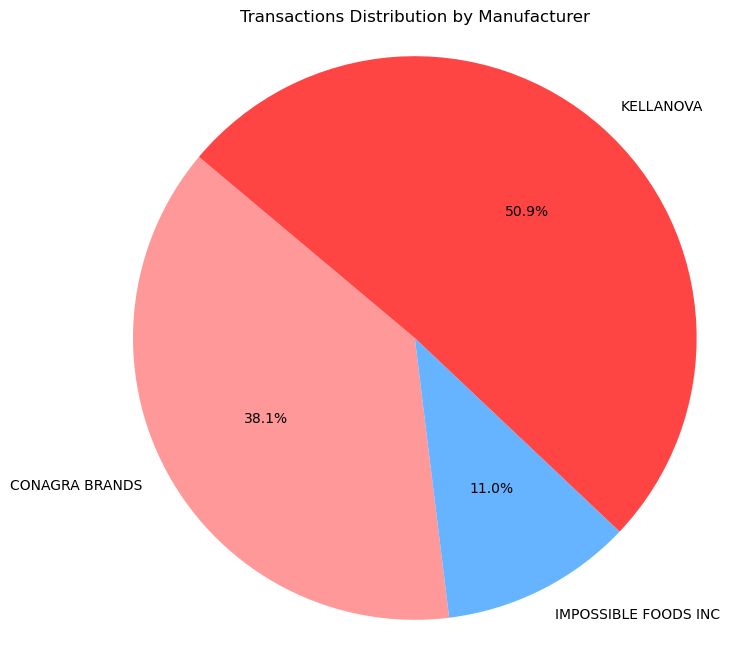

In [54]:
counts = table_2['Transaction Records'].sum()  # Summing the given values for each manufacturer

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(table_2['Transaction Records'], labels=table_2['Manufacturer Name'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#ff4444' ])
plt.title('Transactions Distribution by Manufacturer')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


### Ranking by Flavor

In [55]:
table_3 = filtered_df.drop_duplicates('Product Name').groupby(['Manufacturer Name', 'Flavor / Scent']).agg({'Product Name':'count'})
table_3['total sales'] = filtered_df.groupby(['Manufacturer Name', 'Flavor / Scent']).agg({'Dollar Sales':'sum'})
table_3['product_rank'] = table_3['Product Name'].rank(ascending = False, method = 'first')
table_3['sales_rank'] = table_3['total sales'].rank(ascending = False)
table_3.head(60)

Product Name   total sales  \
Manufacturer Name    Flavor / Scent                                    
CONAGRA BRANDS       7 GRAIN                         3  1.309555e+08   
                     BARBEQUE                        1  8.384383e+06   
                     BEEF                            1  2.499456e+07   
                     BREAKFAST SAUSAGE               1  5.461156e+06   
                     CHICKEN                         6  1.855102e+08   
                     CHICKEN SCALOPPINI              1  3.537012e+06   
                     CHIPOTLE BLACK BEAN             3  2.433308e+07   
                     CHIPOTLE LIME                   1  3.578117e+06   
                     CLASSIC                         2  1.008900e+03   
                     FISH                            1  5.207846e+05   
                     GARDEN                          1  1.428746e+06   
                     HOMESTYLE                       2  1.274754e+05   
                     ITALIAN                         1  1.066650e+06   
                     ITALIAN SAUSAGE                 1  1.106966e+06   
                     MANDARIN ORANGE                 1  8.785034e+07   
                     MAPLE SAUSAGE                   1  1.132304e+06   
                     NASHVILLE HOT                   1  1.881774e+07   
                     ORIGINAL                        2  2.541995e+07   
                     REGULAR                        22  5.365776e+08   
                     ROAST                           1  1.113267e+07   
                     SAVORY                          2  2.149102e+06   
                     SIZZLING SZECHUAN               1  5.319576e+06   
                     SPICY                           1  1.821330e+06   
                     SPICY ITALIAN                   1  1.319777e+06   
                     SWEET & SOUR                    1  1.592479e+07   
                     SWEET & TANGY                   1  3.672872e+06   
                     TERIYAKI                        2  4.336291e+07   
                     TURKEY                          1  2.815810e+07   
                     ULTIMATE                        1  4.076499e+06   
                     ULTIMATE BLACK BEAN             1  8.234984e+06   
IMPOSSIBLE FOODS INC BRATWURST                       1  2.369121e+07   
                     CHICKEN                         4  1.175260e+08   
                     HOMESTYLE                       1  4.505414e+07   
                     ITALIAN                         1  5.965307e+06   
                     ITALIAN SAUSAGE                 1  1.333919e+07   
                     REGULAR                         5  7.214120e+08   
                     SAVORY                          3  5.149151e+07   
                     SPICY                           4  3.514959e+07   
                     SPICY SAUSAGE                   2  2.337895e+07   
KELLANOVA            BACON                           2  1.950485e+08   
                     BARBEQUE CHICKEN                1  1.420720e+07   
                     BREAKFAST SAUSAGE               3  1.747002e+08   
                     BUFFALO                         4  1.761298e+08   
                     CHEDDAR                         1  5.270048e+04   
                     CHEESE                          2  1.334509e+07   
                     CHICKEN                         3  6.688983e+07   
                     CHIPOTLE BLACK BEAN             2  2.516483e+07   
                     CHORIZO                         2  4.684184e+07   
                     CLASSIC                         2  2.201651e+04   
                     FALAFEL                         1  8.282953e+05   
                     GARDEN                          1  4.217641e+02   
                     GARDEN VEGETABLE                4  1.072739e+08   
                     GRILLED                         2  9.417863e+07   
                     HOT & SPICY                     1  3.008024e+06   
          

Although there are 6 chicken products from conagra, its sales looks bad. (Sales Ranking No.8)
Compared to KELLANOVA & IMPOSSIBLE, Conagra do a better job on chicken products. However, KELLANOVA have 4 chicken products.
1. Chicken (no. 18)
2. Sweet Barbeque Chicken (no.47)
3. Vegetabel Chicken (11)
4. Barbeque Chicken (31)
and main sales maked from KELLANOVA & IMPOSSIBLE are not from chicken products. The fact that most sales earned are associated with original, bacon, baffulo flavor, sausage, and more options for customer are the reasons that there is a large gap between Conagra and these two companies.

According to table1 to table 3, suggestions could be:
1. Develop more flavor, especially regular one
2. Provide more options for single product

One reason might for regular flavor products has most sales might be:
1. people like to season it later based on their preference
2. flavor adjusted by manufacturer is just terrible

### What products should Conagra publish in the future?

In [56]:
# Set 2023 as boundary
recent_time_filtered_df = filtered_df[filtered_df['Year'] >= 2023]
past_time_filtered_df = filtered_df[filtered_df['Year'] < 2023]['Product Name']
time_product_filtered_df = recent_time_filtered_df[~recent_time_filtered_df['Product Name'].isin(past_time_filtered_df)]
time_product_filtered_df = time_product_filtered_df[['Year', 'Manufacturer Name', 'Product Name','Flavor / Scent', 'Dollar Sales']]
time_product_filtered_df.drop_duplicates('Product Name').sort_values('Dollar Sales', ascending = False) #table 4

,Year,Manufacturer Name,Product Name,Flavor / Scent,Dollar Sales
737859,2023,KELLANOVA,FROZEN ORIGINAL MEAT SUBSTITUTE SAUSAGE PATTY ...,ORIGINAL,20533.720000
755267,2023,IMPOSSIBLE FOODS INC,REFRIGERATED REGULAR MEAT SUBSTITUTE PATTY 10....,REGULAR,4878.220310
771879,2023,IMPOSSIBLE FOODS INC,FROZEN CHICKEN PLANT BASED CHICKEN SUBSTITUTE ...,CHICKEN,3930.210000
740759,2023,IMPOSSIBLE FOODS INC,FROZEN SPICY PLANT BASED CHICKEN SUBSTITUTE NU...,SPICY,481.104507
740760,2023,IMPOSSIBLE FOODS INC,FROZEN SPICY PLANT BASED CHICKEN SUBSTITUTE PA...,SPICY,472.056896
743250,2023,KELLANOVA,FROZEN ORIGINAL PLANT BASED CHICKEN SUBSTITUTE...,ORIGINAL,216.620884
742887,2023,CONAGRA BRANDS,FROZEN REGULAR MEAT SUBSTITUTE CRUMBLE 14 OZ,REGULAR,54.673585
765317,2023,KELLANOVA,FROZEN CHEDDAR MEAT SUBSTITUTE FRIES 13.5 OZ,CHEDDAR,42.392854
739032,2023,IMPOSSIBLE FOODS INC,FROZEN CHICKEN PLANT BASED CHICKEN SUBSTITUTE ...,CHICKEN,22.034550
765336,2023,KELLANOVA,FROZEN STEAKHOUSE STYLE MEAT SUBSTITUTE BURGER...,STEAKHOUSE STYLE,17.383378


### Trend Plot

/var/folders/cr/w41p_r656b17sf3g2fyh6wnm0000gn/T/ipykernel_62819/3681078267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Period'] = filtered_df['Year'].astype(str) + ' Q' + filtered_df['Quarter'].astype(str)


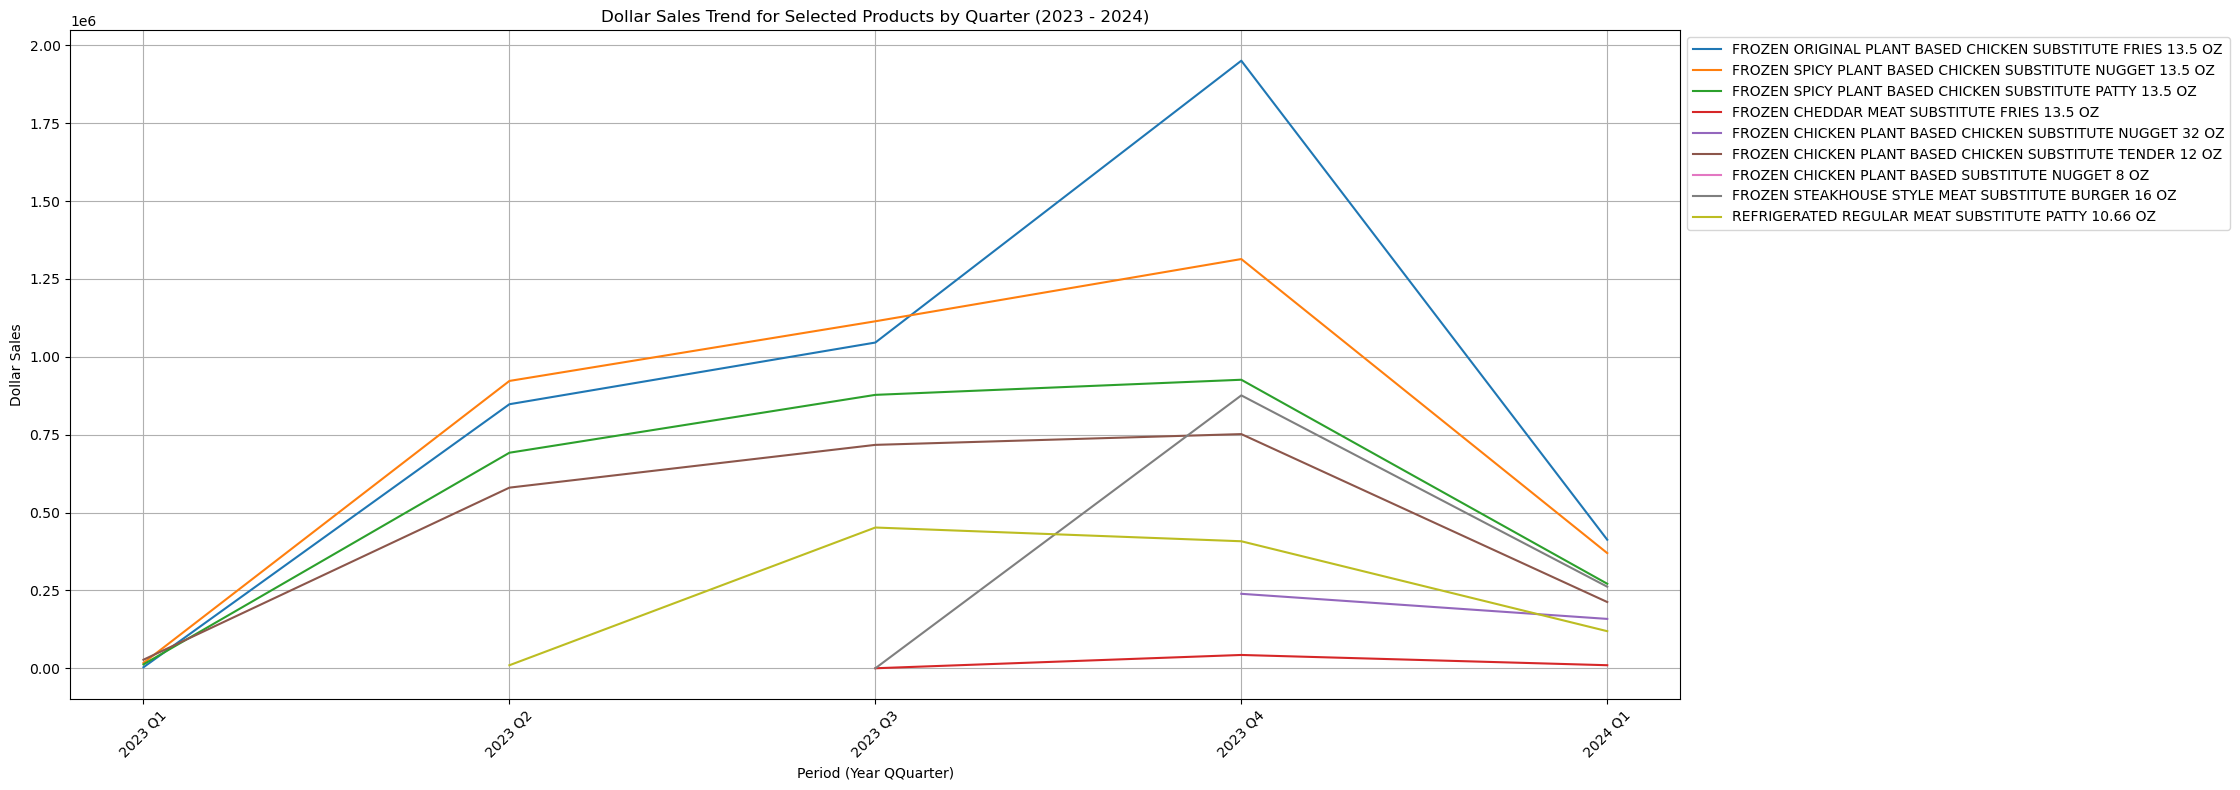

In [57]:
filtered_df['Period'] = filtered_df['Year'].astype(str) + ' Q' + filtered_df['Quarter'].astype(str)

products_of_interest = ['FROZEN ORIGINAL PLANT BASED CHICKEN SUBSTITUTE FRIES 13.5 OZ',
                        'FROZEN SPICY PLANT BASED CHICKEN SUBSTITUTE NUGGET 13.5 OZ',
                        'FROZEN SPICY PLANT BASED CHICKEN SUBSTITUTE PATTY 13.5 OZ',
                       'FROZEN CHEDDAR MEAT SUBSTITUTE FRIES 13.5 OZ',
                       'FROZEN CHICKEN PLANT BASED CHICKEN SUBSTITUTE NUGGET 32 OZ',
                       'FROZEN CHICKEN PLANT BASED CHICKEN SUBSTITUTE TENDER 12 OZ',
                       'FROZEN CHICKEN PLANT BASED SUBSTITUTE NUGGET 8 OZ',
                       'FROZEN STEAKHOUSE STYLE MEAT SUBSTITUTE BURGER 16 OZ',
                       'REFRIGERATED REGULAR MEAT SUBSTITUTE PATTY 10.66 OZ']

product_filtered_df = filtered_df[filtered_df['Product Name'].isin(products_of_interest)]

# Aggregate 'Dollar Sales' by 'Year' and 'Product Name'
aggregated_df = product_filtered_df.groupby(['Period', 'Product Name']).agg({'Dollar Sales': 'sum'}).reset_index()

# Pivot the DataFrame to have 'Product Name' as columns, 'Year' as the index, and 'Dollar Sales' as values
pivoted_df = aggregated_df.pivot(index='Period', columns='Product Name', values='Dollar Sales')
pivoted_df

# Plot the line plot
plt.figure(figsize=(30, 8))
for product in products_of_interest:
    plt.plot(pivoted_df.index, pivoted_df[product], label=product)

plt.title('Dollar Sales Trend for Selected Products by Quarter (2023 - 2024)')
plt.xlabel('Period (Year QQuarter)')
plt.ylabel('Dollar Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Place the legend outside the plot to the right
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust the plot to ensure everything fits without overlapping
plt.show()


Things than can conlude from table 4 & visualization above:
1. 10 new plant-based products were published since 2023, but none of the comes from Gardein
2. Top 3 products that sales most are:
    1. FROZEN ORIGINAL PLANT BASED CHICKEN SUBSTITUTE FRIES 13.5 OZ
    2. FROZEN SPICY PLANT BASED CHICKEN SUBSTITUTE NUGGET 13.5 OZ
    3. FROZEN SPICY PLANT BASED CHICKEN SUBSTITUTE PATTY 13.5 OZ
3. Based on this situation, these three products are presenting upword trend. This indicates that more people tend to buy such products. Or, these kind of products are attracting buyers. Thus, Conagra might also develop this kind of products
4. "Refrigerated Regular Meat Substitute Patty" probably is not a good idea for Gardein as it present downword trend since 2023 Q3.
5. Again, data in 2024 is not sufficent. 

### Package Size Impact

In [58]:
model_dataset = filtered_df[['Geography', 'Year', 'Quarter', 'Month', 'Season', 'Form', 'Manufacturer Name', 'Flavor / Scent', 'Product Name', 'Unit Sales', 'Volume Sales', 'Dollar Sales', 'Price per Unit']].reset_index()
model_dataset = model_dataset[['Geography', 'Year', 'Quarter', 'Month', 'Season', 'Form', 'Manufacturer Name', 'Flavor / Scent', 'Product Name', 'Unit Sales', 'Volume Sales', 'Dollar Sales', 'Price per Unit']]
model_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195627 entries, 0 to 195626
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Geography          195627 non-null  object 
 1   Year               195627 non-null  int64  
 2   Quarter            195627 non-null  int64  
 3   Month              195627 non-null  int64  
 4   Season             195627 non-null  object 
 5   Form               195627 non-null  object 
 6   Manufacturer Name  195627 non-null  object 
 7   Flavor / Scent     195627 non-null  object 
 8   Product Name       195627 non-null  object 
 9   Unit Sales         195627 non-null  float64
 10  Volume Sales       195627 non-null  float64
 11  Dollar Sales       195627 non-null  float64
 12  Price per Unit     195627 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 19.4+ MB


In [59]:
def extract_size(row):
    return row.split(' ')[-2]

def map_size_into_text(row):
    if row <= 12:
        return 'Small'
    elif row >= 18:
        return 'Large'
    else:
        return 'Medium'

In [60]:
model_dataset['Package Size'] = model_dataset['Product Name'].apply(extract_size)
model_dataset['Package Size'] = model_dataset['Package Size'].astype(float)

In [61]:
model_dataset = model_dataset[['Geography', 'Year', 'Quarter', 'Month', 'Season', 'Manufacturer Name', 'Form', 'Flavor / Scent', 'Package Size', 'Unit Sales', 'Volume Sales', 'Dollar Sales', 'Price per Unit']]
model_dataset = model_dataset.rename(columns={"Dollar Sales": "Dollar_Sales", "Flavor / Scent": "Flavor"})
model_dataset['Portion'] = model_dataset['Package Size'].apply(map_size_into_text)
model_dataset

,Geography,Year,Quarter,Month,Season,Manufacturer Name,Form,Flavor,Package Size,Unit Sales,Volume Sales,Dollar_Sales,Price per Unit,Portion
0,Total US,2020,1,1,Winter,CONAGRA BRANDS,TIP,BEEF,9.00,29839.311737,16784.612852,104457.642635,3.500672,Small
1,Total US,2020,1,1,Winter,CONAGRA BRANDS,BURGER,CHIPOTLE BLACK BEAN,12.00,26328.357411,19746.268058,97010.214893,3.684628,Small
2,Total US,2020,1,1,Winter,CONAGRA BRANDS,BURGER,CHIPOTLE BLACK BEAN,48.00,37.000000,111.000000,435.620000,11.773514,Large
3,Total US,2020,1,1,Winter,CONAGRA BRANDS,BURGER,CHIPOTLE BLACK BEAN,50.80,4380.000000,13906.500000,63462.960000,14.489260,Large
4,Total US,2020,1,1,Winter,CONAGRA BRANDS,MEATBALL,CLASSIC,12.70,2.000000,1.587600,6.480000,3.240000,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195622,West,2024,1,1,Winter,IMPOSSIBLE FOODS INC,PATTY,REGULAR,10.66,15.531694,10.348768,148.223625,9.543301,Small
195623,West,2024,1,1,Winter,IMPOSSIBLE FOODS INC,PATTY,REGULAR,8.00,8716.835892,4358.417946,46849.614533,5.374612,Small
195624,West,2024,1,1,Winter,IMPOSSIBLE FOODS INC,ROLL,SAVORY,14.00,2323.737534,2033.270342,11800.249721,5.078134,Medium
195625,West,2024,1,1,Winter,IMPOSSIBLE FOODS INC,ROLL,SPICY,14.00,3862.869813,3380.011087,19939.905740,5.161941,Medium


In [62]:
model_dataset['Package Size'].describe() # show column statistic data

count    195627.000000
mean         13.540915
std           8.284284
min           5.250000
25%           9.000000
50%          10.600000
75%          14.000000
max          56.000000
Name: Package Size, dtype: float64

In [63]:
model_dataset['Package Size'].unique() # show what values are in there

array([ 9.  , 12.  , 48.  , 50.8 , 12.7 , 40.  ,  8.  , 10.1 , 24.  ,
       13.7 , 33.8 , 10.  ,  8.8 , 10.6 , 10.5 , 15.75,  5.25, 16.  ,
       16.2 , 56.  ,  9.5 , 13.5 ,  8.4 , 32.  , 18.9 ,  9.4 , 18.  ,
       40.8 ,  8.1 , 31.5 ,  8.6 , 12.4 , 12.3 ,  9.75, 21.  , 20.  ,
        7.9 ,  8.5 , 11.  , 36.  , 10.3 , 14.1 , 15.  ,  6.5 , 14.7 ,
       14.  , 35.2 , 14.6 , 14.8 , 12.8 ,  7.4 , 42.8 , 16.64, 10.66,
       15.8 ])

Based on this information, I will categorize any package size that:
1. smaller than and equal to  12 as "Small"
2. greater than and equal to 20 as "Large"
3. smaller than 18 & greater than 12 as "Medium"

Logic behind this is using mean as threshold and +1 std to mean for large boundary

In [64]:
model_dataset.groupby(['Portion']).agg({'Dollar_Sales':'sum'})

,Dollar_Sales
Portion,
Large,6.078490e+08
Medium,1.270287e+09
Small,3.039049e+09


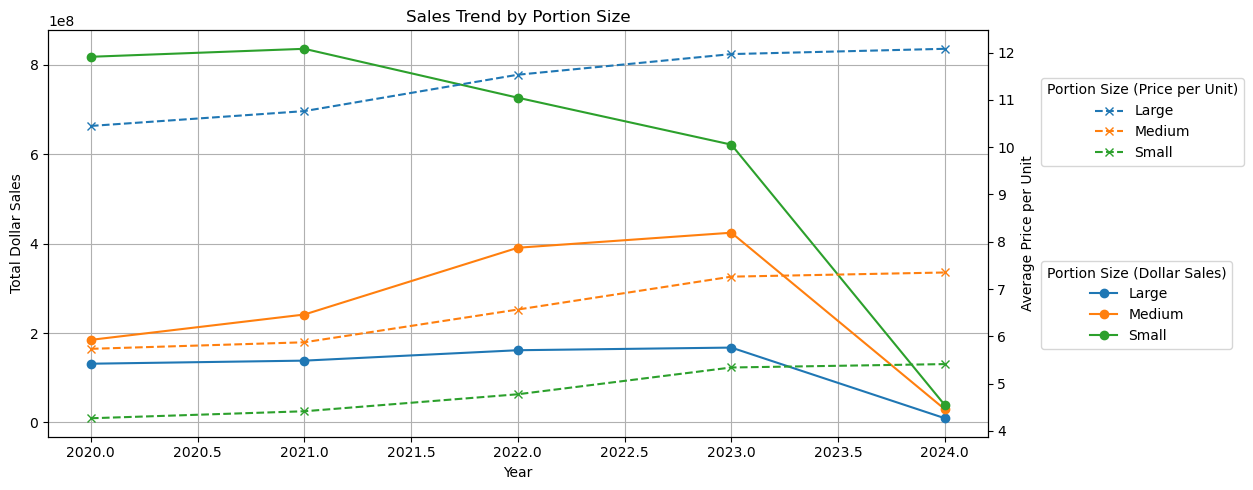

In [65]:
# Group the data by 'Year' and 'Portion' and get the sum of 'Dollar_Sales' and 'Unit_Sales'
grouped_data = model_dataset.groupby(['Year', 'Portion']).agg({
    'Dollar_Sales': 'sum',
    'Price per Unit': 'mean'
}).reset_index()

# Pivot the data to have years as the index and portion sizes as columns for each sales type
pivot_dollar_sales = grouped_data.pivot(index='Year', columns='Portion', values='Dollar_Sales')
pivot_unit_sales = grouped_data.pivot(index='Year', columns='Portion', values='Price per Unit')

# Create the first plot with 'Dollar_Sales'
fig, ax1 = plt.subplots(figsize=(15, 5))

line1 = pivot_dollar_sales.plot(kind='line', marker='o', ax=ax1)
ax1.set_title('Sales Trend by Portion Size')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Dollar Sales')
ax1.grid(True)

# Create a secondary y-axis for 'Unit_Sales'
ax2 = ax1.twinx()
line2 = pivot_unit_sales.plot(kind='line', marker='x', ax=ax2, linestyle='--')
ax2.set_ylabel('Average Price per Unit')

# Place the legend for 'Dollar_Sales' on the right side outside the plot
ax1.legend(title='Portion Size (Dollar Sales)', loc='upper left', bbox_to_anchor=(1.05, 0.45))

# Place the legend for 'Unit_Sales' below the first legend
ax2.legend(title='Portion Size (Price per Unit)', loc='upper left', bbox_to_anchor=(1.05, 0.90))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Display the plot
plt.show()


Pattern(Sales):
1. Data is not sufficient in 2024, so the trend will goes down for sure
2. Altough small size present downword trend, it's still selling most
3. Medium size has a obvious upword trend since 2021
4. Large size slightly increase by time

Pattern(Price per Unit):
1. just based on the plot, the price per unit difference between small & medium are approximately 3 dollars, while it's 5 or 6 dollars between small & large.
2. People starting buying more medium size products as small size sales present a downword trend, though the price per unit is getting higher
    1. maybe people find it's more cost-effective to buy medium size
    2. maybe people getting used to plant-based products, it's turning "i will give it a try" to "it's nice, let's take it as our dinner/luncher"

Conclusion:
1. it should focus on small and medium size portion when Conagra publish new products


### Anova & Post-Hoc Analysis: Further proof for publish chicken products

In [66]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [67]:
model = ols('Dollar_Sales ~ C(Flavor)', data=model_dataset).fit()

# Perform the ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
print(anova_results)

# Perform Tukey's HSD test if the ANOVA is significant
if anova_results['PR(>F)'][0] < 0.05:
    tukey_results = pairwise_tukeyhsd(endog=model_dataset['Dollar_Sales'], groups=model_dataset['Flavor'], alpha=0.05)
    #print(tukey_results)


                 sum_sq        df           F  PR(>F)
C(Flavor)  6.847979e+13      70.0  271.863538     0.0
Residual   7.036951e+14  195556.0         NaN     NaN


<strong>ANOVA results shows that there are significant difference between different Flavor.<strong>

In [68]:
model_dataset['CHICKEN'] = model_dataset['Flavor'].apply(lambda flavor: 'CHICKEN' if 'CHICKEN' in flavor.upper() else 'NOT CHICKEN')
model_dataset

,Geography,Year,Quarter,Month,Season,Manufacturer Name,Form,Flavor,Package Size,Unit Sales,Volume Sales,Dollar_Sales,Price per Unit,Portion,CHICKEN
0,Total US,2020,1,1,Winter,CONAGRA BRANDS,TIP,BEEF,9.00,29839.311737,16784.612852,104457.642635,3.500672,Small,NOT CHICKEN
1,Total US,2020,1,1,Winter,CONAGRA BRANDS,BURGER,CHIPOTLE BLACK BEAN,12.00,26328.357411,19746.268058,97010.214893,3.684628,Small,NOT CHICKEN
2,Total US,2020,1,1,Winter,CONAGRA BRANDS,BURGER,CHIPOTLE BLACK BEAN,48.00,37.000000,111.000000,435.620000,11.773514,Large,NOT CHICKEN
3,Total US,2020,1,1,Winter,CONAGRA BRANDS,BURGER,CHIPOTLE BLACK BEAN,50.80,4380.000000,13906.500000,63462.960000,14.489260,Large,NOT CHICKEN
4,Total US,2020,1,1,Winter,CONAGRA BRANDS,MEATBALL,CLASSIC,12.70,2.000000,1.587600,6.480000,3.240000,Medium,NOT CHICKEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195622,West,2024,1,1,Winter,IMPOSSIBLE FOODS INC,PATTY,REGULAR,10.66,15.531694,10.348768,148.223625,9.543301,Small,NOT CHICKEN
195623,West,2024,1,1,Winter,IMPOSSIBLE FOODS INC,PATTY,REGULAR,8.00,8716.835892,4358.417946,46849.614533,5.374612,Small,NOT CHICKEN
195624,West,2024,1,1,Winter,IMPOSSIBLE FOODS INC,ROLL,SAVORY,14.00,2323.737534,2033.270342,11800.249721,5.078134,Medium,NOT CHICKEN
195625,West,2024,1,1,Winter,IMPOSSIBLE FOODS INC,ROLL,SPICY,14.00,3862.869813,3380.011087,19939.905740,5.161941,Medium,NOT CHICKEN


In [69]:
from scipy import stats

# Assuming model_dataset is your DataFrame and it has a 'Dollar Sales' column

# Separate the two groups
chicken_sales = model_dataset[model_dataset['CHICKEN'] == 'CHICKEN']['Dollar_Sales']
not_chicken_sales = model_dataset[model_dataset['CHICKEN'] == 'NOT CHICKEN']['Dollar_Sales']

# Perform t-test
t_stat, p_value = stats.ttest_ind(chicken_sales, not_chicken_sales, equal_var=False)  # Welch's t-test for unequal variances

# If you're testing if chicken sales are greater, only proceed if t_stat is positive
if t_stat > 0:
    # Divide p-value by 2 for a one-tailed test
    one_tailed_p_value = p_value / 2
    
    # Output the result for the one-tailed test
    if one_tailed_p_value < 0.05:
        print(f"Chicken products have significantly higher sales than not chicken products (one-tailed p-value: {one_tailed_p_value}).")
    else:
        print(f"Chicken products do not have significantly higher sales than not chicken products (one-tailed p-value: {one_tailed_p_value}).")
else:
    print("The test statistic is not in the direction of the hypothesis (chicken sales being higher), so we cannot perform a one-tailed test in this direction.")



Chicken products have significantly higher sales than not chicken products (one-tailed p-value: 3.6496735780595657e-16).


<strong>Well, the one-tailed t-test implies that it might be good for Conagra to publish chicken flavor products as they're selling more than other flavor products<strong>

In [70]:
model_dataset['Portion'] = model_dataset['Package Size'].apply(map_size_into_text)
model_dataset

,Geography,Year,Quarter,Month,Season,Manufacturer Name,Form,Flavor,Package Size,Unit Sales,Volume Sales,Dollar_Sales,Price per Unit,Portion,CHICKEN
0,Total US,2020,1,1,Winter,CONAGRA BRANDS,TIP,BEEF,9.00,29839.311737,16784.612852,104457.642635,3.500672,Small,NOT CHICKEN
1,Total US,2020,1,1,Winter,CONAGRA BRANDS,BURGER,CHIPOTLE BLACK BEAN,12.00,26328.357411,19746.268058,97010.214893,3.684628,Small,NOT CHICKEN
2,Total US,2020,1,1,Winter,CONAGRA BRANDS,BURGER,CHIPOTLE BLACK BEAN,48.00,37.000000,111.000000,435.620000,11.773514,Large,NOT CHICKEN
3,Total US,2020,1,1,Winter,CONAGRA BRANDS,BURGER,CHIPOTLE BLACK BEAN,50.80,4380.000000,13906.500000,63462.960000,14.489260,Large,NOT CHICKEN
4,Total US,2020,1,1,Winter,CONAGRA BRANDS,MEATBALL,CLASSIC,12.70,2.000000,1.587600,6.480000,3.240000,Medium,NOT CHICKEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195622,West,2024,1,1,Winter,IMPOSSIBLE FOODS INC,PATTY,REGULAR,10.66,15.531694,10.348768,148.223625,9.543301,Small,NOT CHICKEN
195623,West,2024,1,1,Winter,IMPOSSIBLE FOODS INC,PATTY,REGULAR,8.00,8716.835892,4358.417946,46849.614533,5.374612,Small,NOT CHICKEN
195624,West,2024,1,1,Winter,IMPOSSIBLE FOODS INC,ROLL,SAVORY,14.00,2323.737534,2033.270342,11800.249721,5.078134,Medium,NOT CHICKEN
195625,West,2024,1,1,Winter,IMPOSSIBLE FOODS INC,ROLL,SPICY,14.00,3862.869813,3380.011087,19939.905740,5.161941,Medium,NOT CHICKEN


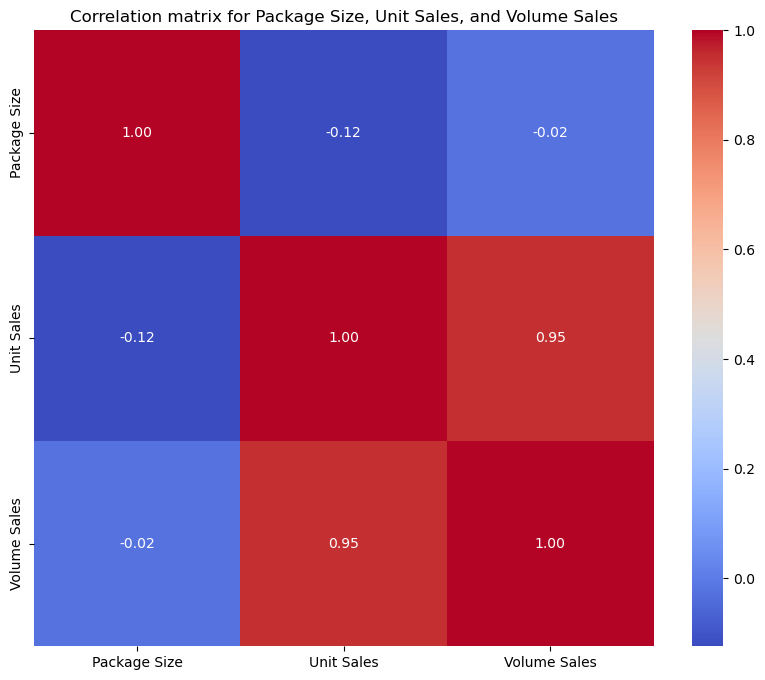

In [26]:
# Assuming 'model_dataset' is your DataFrame and it's already been loaded with your data.
# We will just consider the relevant columns for the correlation matrix.
relevant_columns = model_dataset[['Package Size', 'Unit Sales', 'Volume Sales']]

# Calculating the correlation matrix
correlation_matrix = relevant_columns.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
heatmap.set_title('Correlation matrix for Package Size, Unit Sales, and Volume Sales')

plt.show()


In [27]:
# Assuming your dataframe is named df and you have converted 'Package Size' to int
# Prepare the data for modeling
X = model_dataset[['Package Size', 'Unit Sales', 'Volume Sales']]  # independent variable
y = model_dataset['Dollar_Sales']  # dependent variable

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:           Dollar_Sales   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 8.719e+05
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:37:53   Log-Likelihood:            -1.4642e+06
No. Observations:              132121   AIC:                         2.928e+06
Df Residuals:                  132117   BIC:                         2.928e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -226.3849     94.442     -2.397   

R is good. All three independent variables are significant.

### Analysis: Buyer

In [28]:
bb_df = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Cleaned Data/Panel_HH Buying.xlsx')

In [29]:
filtered_bb_df = bb_df[bb_df['Product'].str.contains('SUBSTITUTE')].dropna()
filtered_bb_df.rename(columns = {'52 Weeks Ending Jan-28-2024 % HHs Buying 2x+': '2024 Week 1 2x+',
                                '52 Weeks Ending Jan-28-2024 % HHs Buying 1x': '2024 Week 1 1x',
                                '52 Weeks Ending Jan-28-2024 % HH Buying': '2024 Week 1',
                                '52 Weeks Ending Jan-29-2023 % HHs Buying 2x+': '2023 Week 1 2x+',
                                '52 Weeks Ending Jan-29-2023 % HHs Buying 1x': '2023 Week 1 1x',
                                '52 Weeks Ending Jan-29-2023 % HH Buying': '2023 Week 1',
                                '52 Weeks Ending Jan-30-2022 % HHs Buying 2x+': '2022 Week 1 2x+',
                                '52 Weeks Ending Jan-30-2022 % HHs Buying 1x': '2022 Week 1 1x',
                                '52 Weeks Ending Jan-30-2022 % HH Buying': '2022 Week 1',
                                '52 Weeks Ending Jan-30-2022 Standard Hierarchy Level': 'Hierarchy'}, inplace=True)
filtered_bb_df = filtered_bb_df[filtered_bb_df['Hierarchy'] == 'SubCategory']
filtered_bb_df.drop(columns = ['Geography', 'Hierarchy'], inplace = True)
filtered_bb_df

,Product,2022 Week 1,2022 Week 1 1x,2022 Week 1 2x+,2023 Week 1,2023 Week 1 1x,2023 Week 1 2x+,2024 Week 1,2024 Week 1 1x,2024 Week 1 2x+
17,FZ MEAT SUBSTITUTES,13.213465,5.522439,7.691025,12.204339,5.237158,6.967180,9.933331,4.169280,5.764052
18,FZ POULTRY SUBSTITUTE,6.196199,2.776944,3.419255,5.838505,2.577777,3.260728,4.728191,2.082754,2.645437
19,PROCESSED FZ POULTRY SUBSTITUTE,3.124632,1.913912,1.210720,4.013782,2.197045,1.816737,2.999120,1.515419,1.483701
20,PROCESSED RFG POULTRY SUBSTITUTE,0.728380,0.495606,0.232774,0.686572,0.403127,0.283446,0.452968,0.281451,0.171517
21,RFG MEAT SUBSTITUTES,10.589058,4.474305,6.114753,8.317554,3.486492,4.831061,6.699186,2.929267,3.769919
22,RFG POULTRY SUBSTITUTE,0.619837,0.439062,0.180775,0.501559,0.330008,0.171551,0.310647,0.204753,0.105894


In [30]:
filtered_bb_df.columns

Index(['Product', '2022 Week 1', '2022 Week 1 1x', '2022 Week 1 2x+',
       '2023 Week 1', '2023 Week 1 1x', '2023 Week 1 2x+', '2024 Week 1',
       '2024 Week 1 1x', '2024 Week 1 2x+'],
      dtype='object')

In [31]:
def add_three_weeks(row, year, week1_suffix, week2_suffix, week3_suffix):
    week1_column = f"{year} Week {week1_suffix}"
    week2_column = f"{year} Week {week2_suffix}"
    week3_column = f"{year} Week {week3_suffix}"
    return row[week1_column] + row[week2_column] + row[week3_column]




In [32]:
filtered_bb_df['2022 Weeks'] = filtered_bb_df.apply(lambda row: add_three_weeks(row, '2022', '1', '1 1x', '1 2x+'), axis=1)
filtered_bb_df['2023 Weeks'] = filtered_bb_df.apply(lambda row: add_three_weeks(row, '2023', '1', '1 1x', '1 2x+'), axis=1)
filtered_bb_df['2024 Weeks'] = filtered_bb_df.apply(lambda row: add_three_weeks(row, '2024', '1', '1 1x', '1 2x+'), axis=1)


In [33]:
filtered_bb_df

,Product,2022 Week 1,2022 Week 1 1x,2022 Week 1 2x+,2023 Week 1,2023 Week 1 1x,2023 Week 1 2x+,2024 Week 1,2024 Week 1 1x,2024 Week 1 2x+,2022 Weeks,2023 Weeks,2024 Weeks
17,FZ MEAT SUBSTITUTES,13.213465,5.522439,7.691025,12.204339,5.237158,6.967180,9.933331,4.169280,5.764052,26.426929,24.408677,19.866663
18,FZ POULTRY SUBSTITUTE,6.196199,2.776944,3.419255,5.838505,2.577777,3.260728,4.728191,2.082754,2.645437,12.392397,11.677009,9.456382
19,PROCESSED FZ POULTRY SUBSTITUTE,3.124632,1.913912,1.210720,4.013782,2.197045,1.816737,2.999120,1.515419,1.483701,6.249263,8.027564,5.998240
20,PROCESSED RFG POULTRY SUBSTITUTE,0.728380,0.495606,0.232774,0.686572,0.403127,0.283446,0.452968,0.281451,0.171517,1.456761,1.373145,0.905935
21,RFG MEAT SUBSTITUTES,10.589058,4.474305,6.114753,8.317554,3.486492,4.831061,6.699186,2.929267,3.769919,21.178116,16.635107,13.398373
22,RFG POULTRY SUBSTITUTE,0.619837,0.439062,0.180775,0.501559,0.330008,0.171551,0.310647,0.204753,0.105894,1.239673,1.003119,0.621294


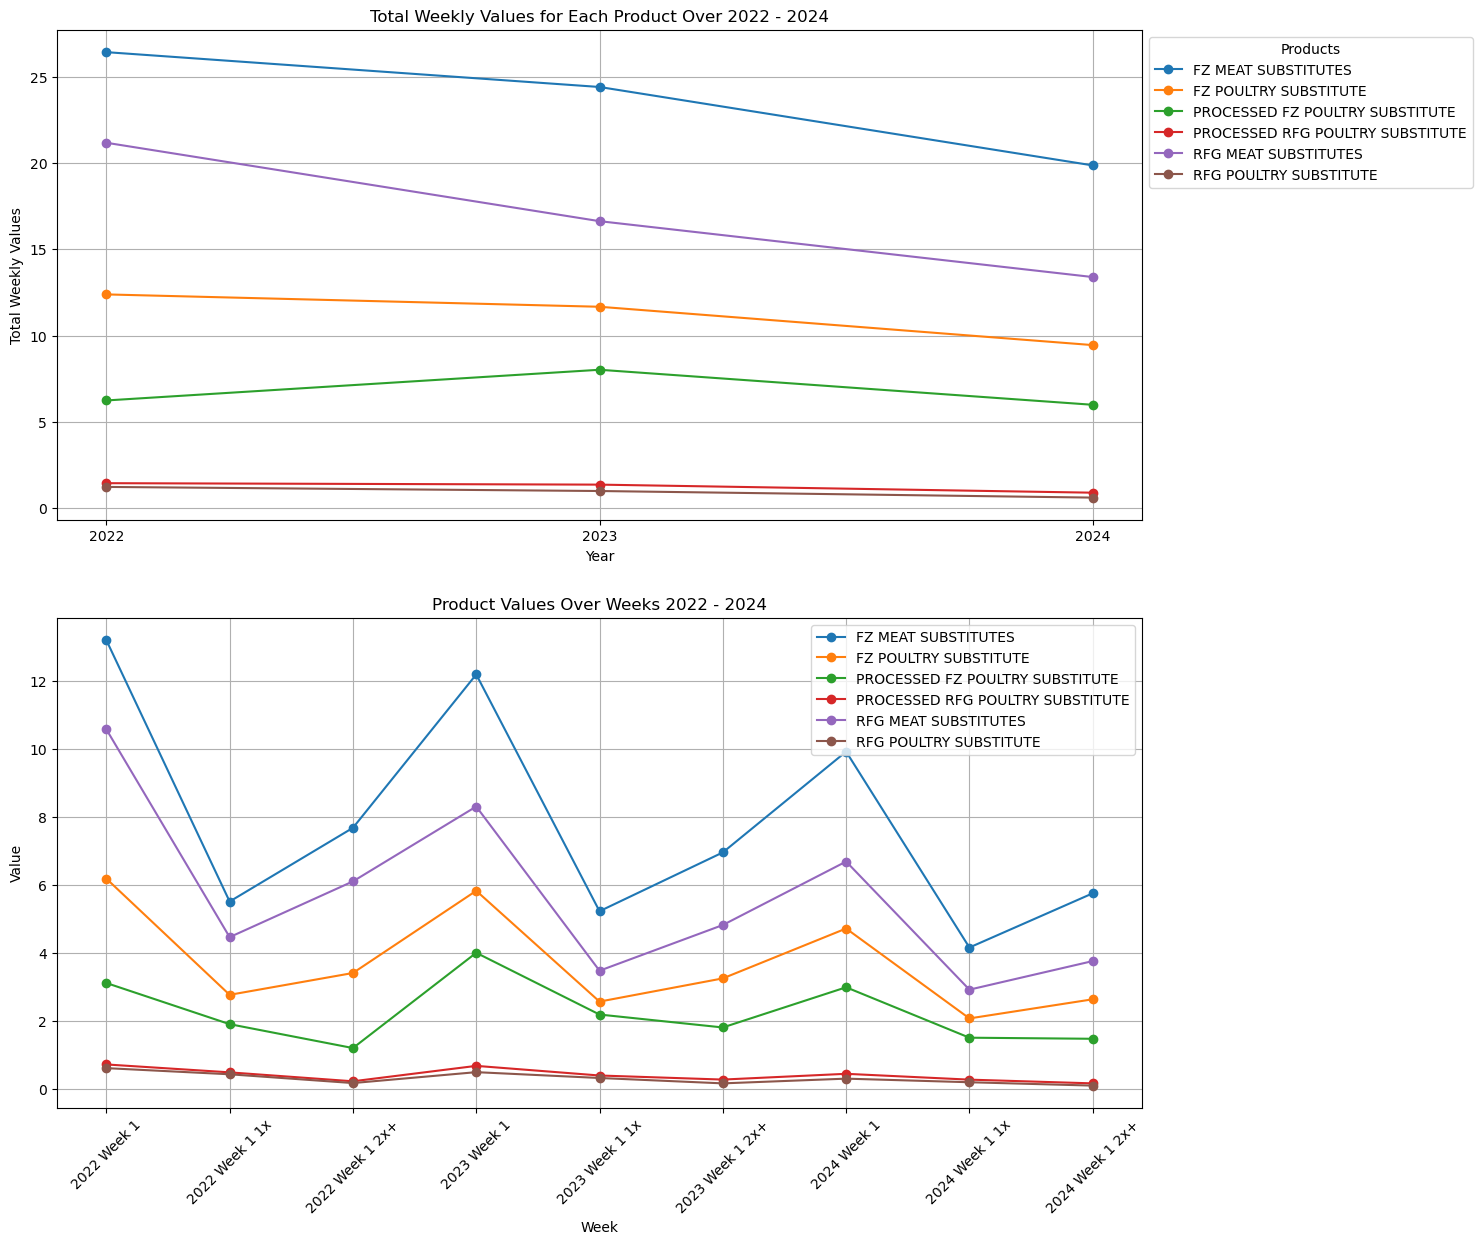

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(14, 14))  # 2 Rows, 1 Column

# First subplot
for index, row in filtered_bb_df.iterrows():
    axes[0].plot(['2022', '2023', '2024'], row[['2022 Weeks', '2023 Weeks', '2024 Weeks']], marker='o', label=row['Product'])

axes[0].set_title('Total Weekly Values for Each Product Over 2022 - 2024')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Weekly Values')
axes[0].legend(title='Products', loc='upper left', bbox_to_anchor=(1, 1))
axes[0].grid(True)
axes[0].set_xticks(['2022', '2023', '2024'])

# Second subplot
# Reshaping the DataFrame to have one column for weeks and one for values
filtered_bb_df = filtered_bb_df.drop(columns = ['2022 Weeks', '2023 Weeks', '2024 Weeks'])
df_melted = filtered_bb_df.melt(id_vars=['Product'], var_name='Week', value_name='Value')
# Assuming 'Week' column has the pattern 'YYYY Week N', extract year for sorting
df_melted['Year'] = df_melted['Week'].apply(lambda x: x.split()[0])
df_melted.sort_values(by=['Product', 'Year'], inplace=True)

# Plot each product
week_ticks = sorted(df_melted['Week'].unique())

for product, group in df_melted.groupby('Product'):
    axes[1].plot(group['Week'], group['Value'], marker='o', label=product)

# Here is where you set the tick locations and labels
axes[1].set_xticks(week_ticks)  # Set the tick locations
axes[1].set_xticklabels(week_ticks, rotation=45)  # Set the tick labels with rotation

axes[1].set_xlabel('Week')
axes[1].set_ylabel('Value')
axes[1].set_title('Product Values Over Weeks 2022 - 2024')
axes[1].legend()
axes[1].grid(True)



Data used in these two visualizations are from same of week of different years respectively, which is not sufficient, but it did shows us a pattern that <strong> people like to buy non-processed poultry substitute </strong>

This also can be infered as people don't like to buy non-processed substitute. Probably because of the following reason:
1. Some processed foods contain a lot of salt, fat, and sugar
2. One study found that your risk of cancer goes up with the amount of ultra-processed food you eat.
3. Processed foods are easier for your body to digest than foods in their natural state. This means your body burns fewer calories when you digest processed foods.

Resource: https://www.webmd.com/diet/what-are-processed-foods

Suggestion:
<strong>Don't consider processed plant-based food</strong>

## Analysis: Demographic & might associated with ads marketing strategy

In [35]:
demo_df = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Cleaned Data/Panel_Buyer Distribution.xlsx')
demo_df.head()

,Geography,Time,Target Group 1,NBD Adjustment,HH Demo Summary,MEAT - FZ Buyer Distribution,MEAT - FZ Buyer Index,POULTRY - FZ/RFG Buyer Distribution,POULTRY - FZ/RFG Buyer Index,PROCESSED POULTRY - FZ/RFG Buyer Distribution,...,BOSS-RFG FISH/HERRING/SEAFOOD Buyer Distribution,BOSS-RFG FISH/HERRING/SEAFOOD Buyer Index,VITA-RFG FISH/HERRING/SEAFOOD Buyer Distribution,VITA-RFG FISH/HERRING/SEAFOOD Buyer Index,KELLUM-RFG FISH/HERRING/SEAFOOD Buyer Distribution,KELLUM-RFG FISH/HERRING/SEAFOOD Buyer Index,BAY SHORE BRAND-RFG FISH/HERRING/SEAFOOD Buyer Distribution,BAY SHORE BRAND-RFG FISH/HERRING/SEAFOOD Buyer Index,YAMASA-RFG FISH/HERRING/SEAFOOD Buyer Distribution,YAMASA-RFG FISH/HERRING/SEAFOOD Buyer Index
0,Total US - All Outlets,52 Weeks Ending Jan-28-2024,All Households,NBD_Dollars,All HH Income Per Capita,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0
1,Total US - All Outlets,52 Weeks Ending Jan-28-2024,All Households,NBD_Dollars,Lower,25.877603,96.465882,23.858416,88.938805,25.522895,...,NaN,NaN,19.902109,74.190583,NaN,NaN,NaN,NaN,NaN,NaN
2,Total US - All Outlets,52 Weeks Ending Jan-28-2024,All Households,NBD_Dollars,Middle,40.378242,103.848154,39.825727,102.427148,39.607621,...,NaN,NaN,42.827347,110.146967,58.058593,149.319967,NaN,NaN,NaN,NaN
3,Total US - All Outlets,52 Weeks Ending Jan-28-2024,All Households,NBD_Dollars,Upper,33.744155,98.401425,36.315858,105.900774,34.869484,...,63.623543,185.532793,37.270545,108.684739,NaN,NaN,NaN,NaN,NaN,NaN
4,Total US - All Outlets,52 Weeks Ending Jan-28-2024,All Households,NBD_Dollars,All HH Size,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0


In [36]:
filtered_columns = demo_df.columns[((demo_df.columns.str.contains('SUBSTITUTE')) & (demo_df.columns.str.contains('Distribution'))) *
                                   ((demo_df.columns.str.contains('IMPOSSIBLE')) | 
                                    (demo_df.columns.str.contains('MORNINGSTAR')) |
                                    (demo_df.columns.str.contains('GARDEIN'))) &
                                    (demo_df.columns.str.contains('MEAT')) &
                                    (demo_df.columns.str.contains('FZ'))]
filtered_demo_df = demo_df[filtered_columns].copy()
filtered_demo_df.insert(0, 'HH Demo Summary', demo_df['HH Demo Summary'])
filtered_demo_df.insert(1, 'FZ MEAT SUBSTITUTES Buyer Distribution', demo_df['FZ MEAT SUBSTITUTES Buyer Distribution'])

In [37]:
filtered_demo_df

,HH Demo Summary,FZ MEAT SUBSTITUTES Buyer Distribution,GARDEIN-FZ MEAT SUBSTITUTES Buyer Distribution,IMPOSSIBLE-FZ MEAT SUBSTITUTES Buyer Distribution,MORNINGSTAR FARMS-FZ MEAT SUBSTITUTES Buyer Distribution
0,All HH Income Per Capita,100.000000,100.000000,100.000000,100.000000
1,Lower,21.501111,20.190833,23.266886,21.251793
2,Middle,38.151841,37.134743,39.610589,38.867882
3,Upper,40.347048,42.674424,37.122525,39.880326
4,All HH Size,100.000000,100.000000,100.000000,100.000000
...,...,...,...,...,...
163,County Size B Over 150K Pop,31.501093,32.456604,30.535811,31.884393
164,County Size C/D,20.464555,22.276224,25.952712,24.252200
165,All HH Hispanic Ethnicity,100.000000,100.000000,100.000000,100.000000
166,Acculturated Hispanic,10.781606,9.570267,13.643446,9.363037


Data to be further explored:
1. ALL HH Income per capita
2. Race
3. Gender (education panel)
This could be associated with tv ads development and deployment.